In [2]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
h,w=np.array([720,1280])

In [4]:
# lets leave rotation and the camera matrix unchanged


R0=np.linalg.inv(np.array([[0.9242,-0.2864,0.2526],
                  [0.3812,0.7312,-0.5658],
                  [-0.0227,0.6192,0.7849]]))

R1=np.linalg.inv(np.array([[0.6989,-0.3543,0.6213],
                  [0.7148,0.3153,-0.6243],
                  [0.0253,0.8804,0.4736]]))

T0=np.array([-1142.2,183.7513,1669.1])

T1=np.array([-398.5379,165.7630,1398.9])

#Focallength(Re)
cam0_f=np.array([766.8537,769.1458])
cam1_f=np.array([765.3281,767.4927])

#Principle Point(Re)
cam0_c=np.array([647.6205,345.3208])
cam1_c=np.array([641.5385,366.9369])

#Distortion
cam0_dist_r=np.array([0.1313,-0.2132])
cam0_dist_t=np.array([0,0])
cam1_dist_r=np.array([0.1331,-0.2226])
cam1_dist_t=np.array([0,0])

#Intrinsics Matrix
cam0_int=np.array([[cam0_f[0],0,cam0_c[0]],[0,cam0_f[1],cam0_c[1]],[0,0,1]])
cam1_int=np.array([[cam1_f[0],0,cam1_c[0]],[0,cam1_f[1],cam1_c[1]],[0,0,1]])

print('intrinsics Matrix')
print('')
print(cam0_int)
print(cam1_int)

mtx0=cam0_int
mtx1=cam1_int
dist0=np.hstack([cam0_dist_r, cam0_dist_t])
dist1=np.hstack([cam1_dist_r, cam1_dist_t])
print(mtx0)
print(dist0)
print("")
print(mtx1)
print(dist1)

#calibration for new camera matrix

newcameraMtx0,roi0=cv2.getOptimalNewCameraMatrix(mtx0,dist0,(w,h),1,(w,h))
print(newcameraMtx0)
print("")
newcameraMtx1,roi1=cv2.getOptimalNewCameraMatrix(mtx1,dist1,(w,h),1,(w,h))
print(newcameraMtx1)

print(roi0)
print(roi1)


# T0 = np.array([0,0,0]) # Translation vector
RT0 = np.zeros((3,4))  # combined Rotation/Translation matrix
RT0[:3,:3] = R0
RT0[:3, 3] = T0
P0 = np.dot(newcameraMtx0, RT0) # Projection matrix

# # define pose 1

# T1 = np.array([0,0,2.])
RT1 = np.zeros((3,4))
RT1[:3,:3] = R1
RT1[:3, 3] = T1
P1 = np.dot(newcameraMtx1, RT1)

print(P0)
print(P1)

mapx0,mapy0=cv2.initUndistortRectifyMap(mtx0,dist0,None,newcameraMtx0,(w,h),5)
mapx1,mapy1=cv2.initUndistortRectifyMap(mtx1,dist1,None,newcameraMtx1,(w,h),5)

intrinsics Matrix

[[766.8537   0.     647.6205]
 [  0.     769.1458 345.3208]
 [  0.       0.       1.    ]]
[[765.3281   0.     641.5385]
 [  0.     767.4927 366.9369]
 [  0.       0.       1.    ]]
[[766.8537   0.     647.6205]
 [  0.     769.1458 345.3208]
 [  0.       0.       1.    ]]
[ 0.1313 -0.2132  0.      0.    ]

[[765.3281   0.     641.5385]
 [  0.     767.4927 366.9369]
 [  0.       0.       1.    ]]
[ 0.1331 -0.2226  0.      0.    ]
[[595.25317383   0.         689.30863465]
 [  0.         597.20495605 320.08694962]
 [  0.           0.           1.        ]]

[[556.05267334   0.         654.94962865]
 [  0.         570.4743042  383.23937701]
 [  0.           0.           1.        ]]
(176, 57, 1010, 548)
(178, 116, 950, 525)
[[ 7.24291257e+02 -1.63066551e+02  5.27569893e+02  4.70626867e+05]
 [-9.01468799e+01  2.55537719e+02  6.21023433e+02  6.43994315e+05]
 [ 2.52628967e-01 -5.65744744e-01  7.84924891e-01  1.66910000e+03]]
[[ 7.95541214e+02 -1.14077289e+01  3.24235699e+02

[857.44182068 307.92048232   1.        ]
[910.36543741 302.07180983   1.        ]


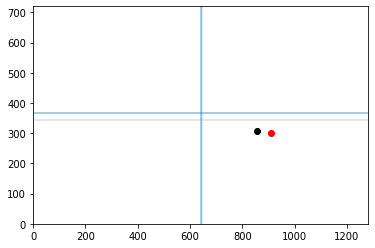

In [5]:
wcsp = np.array([1670, 350, 0, 1.]) # define an arbitrary 3D point in world coordinates

icsp0 = np.dot(P0, wcsp) # project this point using the first camera pose

# print(icsp0)
# #음수 인덱스 -> 끝에서 첫번째
# print(icsp0[-1])
icsp0 = icsp0/icsp0[-1] # normalize as we are in homogenuous coordinates
print(icsp0)

icsp1 = np.dot(P1, wcsp)
icsp1 = icsp1/icsp1[-1]
print(icsp1)

# plot the projection
fig = plt.figure()
plt.xlim((0,1280))
plt.ylim((0,720))

plt.plot(icsp0[0], icsp0[1], 'ko')
plt.plot(icsp1[0], icsp1[1], 'ro')
# plt.plot(583, 299, 'ko')
# plt.plot(760, 277, 'ro') 
    
plt.axvline(cam0_c[0], alpha=0.2)
plt.axhline(cam0_c[1], alpha=0.2)
plt.axvline(cam1_c[0], alpha=0.5)
plt.axhline(cam1_c[1], alpha=0.5)

plt.show()

In [6]:
print(P0)
print(P1)

# res = cv2.triangulatePoints(P0, P1, np.array([icsp0[0],icsp0[1]]), np.array([icsp1[0],icsp1[1]]))
res = cv2.triangulatePoints(P0, P1, np.array([icsp0[0], icsp0[1]]), np.array([icsp1[0], icsp1[1]]))

print(res)
print("3D-Ball")
print(res[:3]/res[-1]) # again, normalize b/c of homogenuous coordinates

[[ 7.24291257e+02 -1.63066551e+02  5.27569893e+02  4.70626867e+05]
 [-9.01468799e+01  2.55537719e+02  6.21023433e+02  6.43994315e+05]
 [ 2.52628967e-01 -5.65744744e-01  7.84924891e-01  1.66910000e+03]]
[[ 7.95541214e+02 -1.14077289e+01  3.24235699e+02  6.94600971e+05]
 [ 3.59837627e+01 -5.93832712e+01  6.83719783e+02  6.30677097e+05]
 [ 6.21286787e-01 -6.24229089e-01  4.73581713e-01  1.39890000e+03]]
[[-9.78735763e-01]
 [-2.05124262e-01]
 [-3.03018213e-17]
 [-5.86069319e-04]]
3D-Ball
[[1.67000000e+03]
 [3.50000000e+02]
 [5.17034766e-14]]
